#Load Dataset

1. **age**: This refers to the age of the patient, typically measured in years. Age is an important factor in heart health, as certain heart conditions and risks are more common at different stages of life.

2. **sex**: This indicates the biological sex of the patient, typically encoded as binary values (0 or 1) where 0 represents female and 1 represents male. Sex is a significant factor in heart disease, as certain conditions may be more prevalent or present differently in different sexes.

3. **cp**: This stands for "chest pain type." It represents the type of chest pain the patient is experiencing and is categorized into four levels:
   - 0: Typical angina (chest pain related to reduced blood flow to the heart muscle)
   - 1: Atypical angina
   - 2: Non-anginal pain
   - 3: Asymptomatic

4. **trestbps**: This is the resting blood pressure of the patient, measured in mmHg (millimeters of mercury). Blood pressure is an essential indicator of heart health, as high blood pressure (hypertension) can strain the heart and blood vessels.

5. **chol**: This represents the serum cholesterol level of the patient, measured in mg/dL (milligrams per deciliter). Cholesterol is a type of fat in the blood, and high cholesterol levels can contribute to the formation of plaque in the arteries, increasing the risk of heart disease.

6. **fbs**: Fasting blood sugar level, measured in mg/dL. This indicates the patient's blood glucose level after fasting for a specific duration. Elevated fasting blood sugar may be associated with diabetes, which is a risk factor for heart disease.

7. **restecg**: This stands for "resting electrocardiographic results." It represents the results of an electrocardiogram (ECG or EKG) performed while the patient is at rest. It may be encoded into several levels, indicating different ECG patterns.

8. **thalach**: This refers to the maximum heart rate achieved by the patient during an exercise test, measured in beats per minute (bpm). The maximum heart rate is an important parameter during exercise stress testing and can provide insights into the patient's cardiovascular fitness.

9. **exang**: This is short for "exercise-induced angina" and is binary (0 or 1) data. It indicates whether the patient experiences chest pain (angina) during exercise (1) or not (0).

10. **oldpeak**: This represents the ST depression induced by exercise relative to rest. It is a measurement on an ECG and helps assess the severity of exercise-related changes in the heart's electrical activity.

11. **slope**: This refers to the slope of the peak exercise ST segment, also measured on an ECG. It provides information about the ST segment's trajectory during exercise and can be categorized into three levels.

12. **ca**: This stands for the number of major vessels colored by fluoroscopy. It represents the number of blood vessels in the heart that were visualized during a diagnostic test.

13. **target**: This is the target attribute or the label, which indicates the presence (1) or absence (0) of heart disease in the patient. It is the variable that the model aims to predict based on the other attributes in the dataset.

In [24]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
#loading the data
data = pd.read_csv('Heart-Attack-Patients-Data.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,0


#EDA - Exploratory Data Analysis

In [26]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1


In [27]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [29]:
data.shape

(303, 13)

In [30]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
target        int64
dtype: object

In [31]:
# checking any prescence of null values

data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
target      0
dtype: int64

In [32]:
# checking any prescence of duplicate rows
data.duplicated().sum()

1

In [33]:
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,1


In [34]:
# confirming the duplicate row using 'age'

data[data['age']==38]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,1
259,38,1,3,120,231,0,1,182,1,3.8,1,0,0


In [35]:
# deleting the duplicate rows

data.drop_duplicates(inplace=True)

In [36]:
# reverify if any duplicates left to remove

data.duplicated().sum()

0

In [37]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'target'],
      dtype='object')

In [38]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000


In [39]:
data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000


In [40]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,-0.429146


#Data Exploration

In [41]:
# Unique values and their counts in target variable

# data['target'].value_counts()
# or
data.target.value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [42]:
# unique values and their percentage in target variable

data.target.value_counts(normalize=True)*100

target
1    54.304636
0    45.695364
Name: proportion, dtype: float64

In [50]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,263.0,53.768061,9.010776,29.0,46.0,54.0,60.0,76.0
sex,263.0,0.684411,0.465636,0.0,0.0,1.0,1.0,1.0
cp,263.0,1.000000,1.037466,0.0,0.0,1.0,2.0,3.0
trestbps,263.0,129.467681,15.390028,94.0,120.0,130.0,140.0,170.0
chol,263.0,241.779468,44.323981,126.0,209.0,239.0,269.0,360.0
fbs,263.0,0.129278,0.336147,0.0,0.0,0.0,0.0,1.0
restecg,263.0,0.532319,0.514949,0.0,0.0,1.0,1.0,2.0
thalach,263.0,150.874525,22.587477,88.0,137.5,155.0,168.0,202.0
exang,263.0,0.315589,0.465636,0.0,0.0,0.0,1.0,1.0
oldpeak,263.0,0.952091,1.036318,0.0,0.0,0.6,1.6,4.0


In [49]:
#in logistic, correlation is not good metrics bcz target is categorical and features are continous. Corelation best works for both target and featurs when they are continuous. If both continous the corleation values would have been greater than 0.5 values.

data.corr()['target']

age        -0.199234
sex        -0.331808
cp          0.408915
trestbps   -0.088254
chol       -0.079090
fbs        -0.014920
restecg     0.136120
thalach     0.394103
exang      -0.430192
oldpeak    -0.440017
slope       0.319048
ca         -0.459368
target      1.000000
Name: target, dtype: float64

Text(0.5, 1.0, 'Age distribuition')

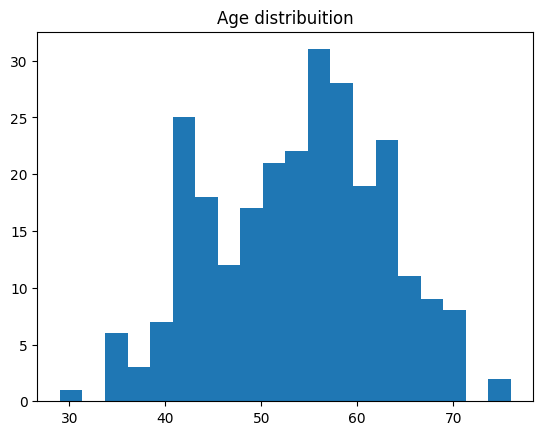

In [79]:
# data['age'].hist(grid=True, bins=20);
# or
plt.hist(data['age'],bins=20)
plt.title('Age distribuition')

In the above graph, we can analyse the distribution of Age column, and we can say that there are 60+ people who are having age between 57 to 63.

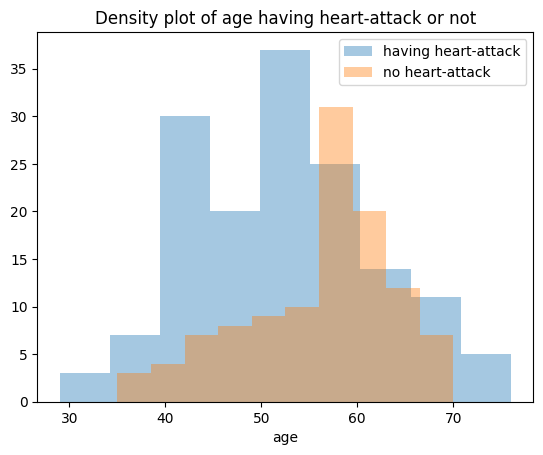

In [80]:
sns.distplot(data[data['target']==1]['age'],  label='having heart-attack',kde=False)
sns.distplot(data[data['target']==0]['age'], label='no heart-attack',kde=False)
plt.legend()
plt.title('Density plot of age having heart-attack or not')
plt.show()

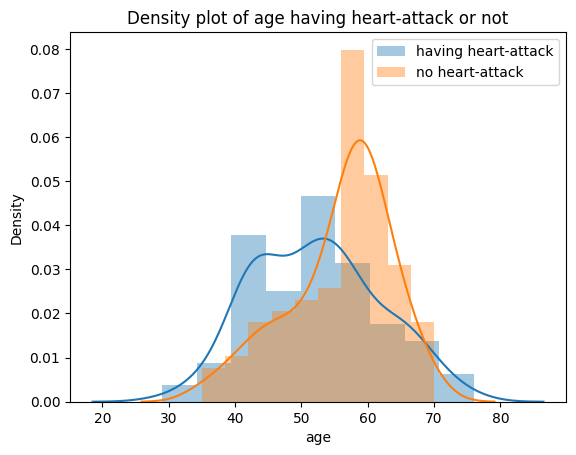

In [82]:
sns.distplot(data[data['target']==1]['age'],  label='having heart-attack',kde=True)
sns.distplot(data[data['target']==0]['age'], label='no heart-attack',kde=True)
plt.legend()
plt.title('Density plot of age having heart-attack or not')
plt.show()

Density graph shows the smoothed distribution of points along the numerical axis. The density peaks where there is the highest concentration of points. In sum, density graphs can be considered smoothed histograms.

Text(0.5, 1.0, 'Resting Blood pressure distribuition')

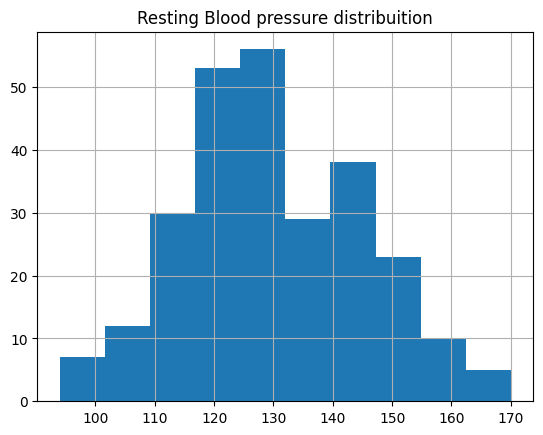

In [84]:
data['trestbps'].hist()
plt.title('Resting Blood pressure distribuition')

Text(0.5, 1.0, 'Resting Blood pressure desnity plot')

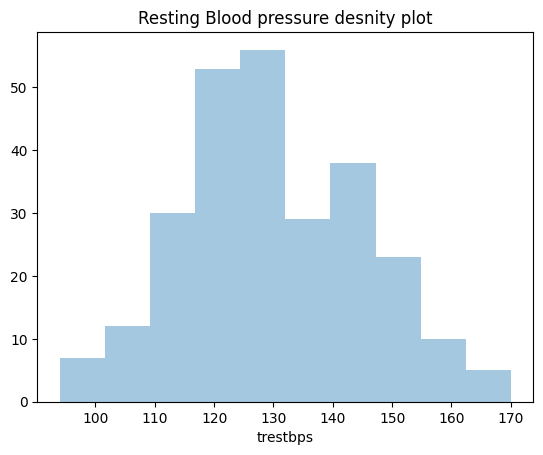

In [85]:
sns.distplot(data['trestbps'], bins=10,kde=False)
plt.title('Resting Blood pressure desnity plot')

In the above grapgh, we are having a normal distribution

<Axes: xlabel='oldpeak'>

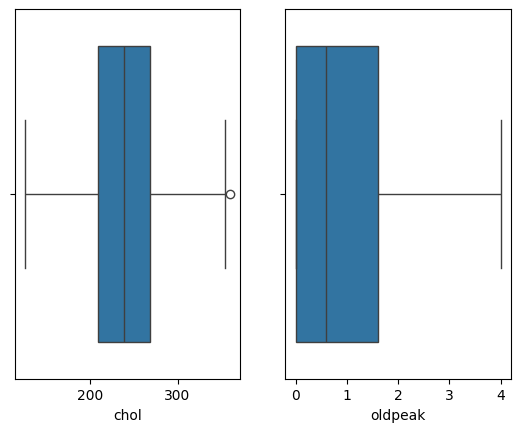

In [86]:
fig, axes = plt.subplots(nrows = 1, ncols=2)
sns.boxplot(x='chol', data=data, orient='v', ax=axes[0])
sns.boxplot(x='oldpeak', data=data,  orient='v', ax=axes[1])

In [88]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'target'],
      dtype='object')

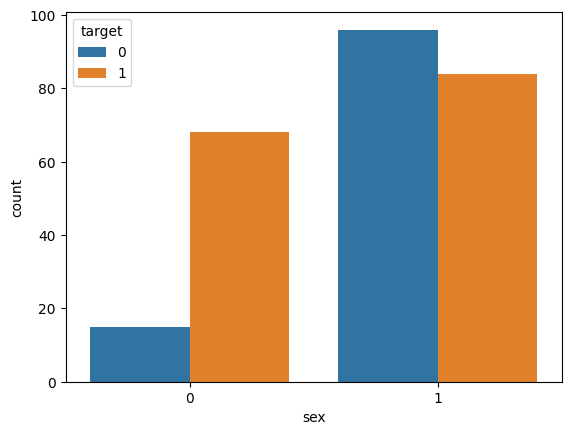

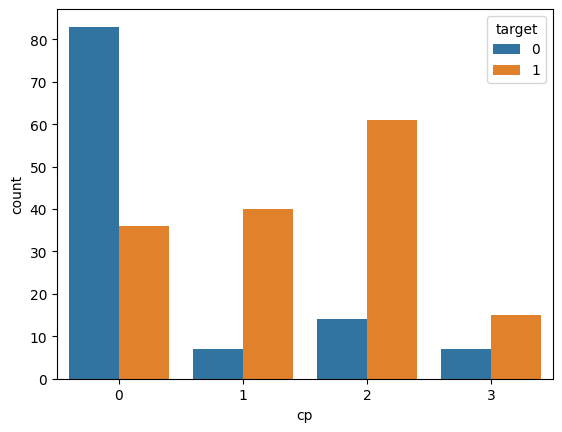

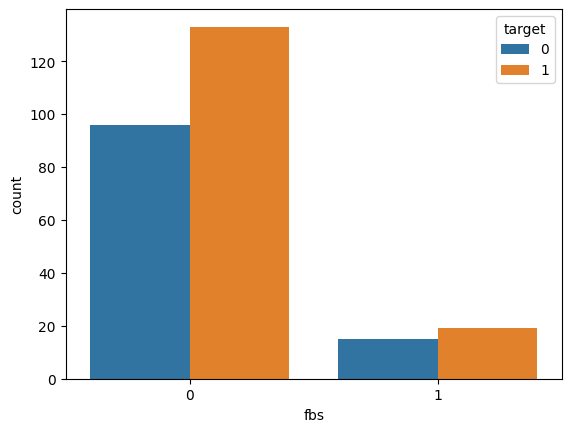

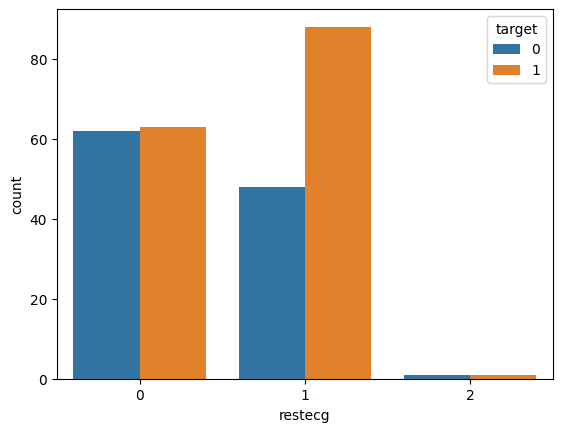

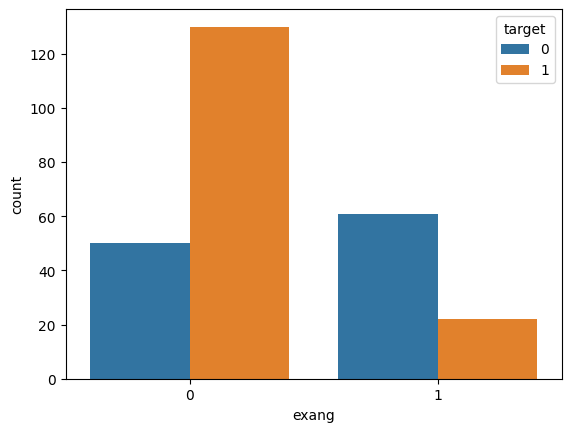

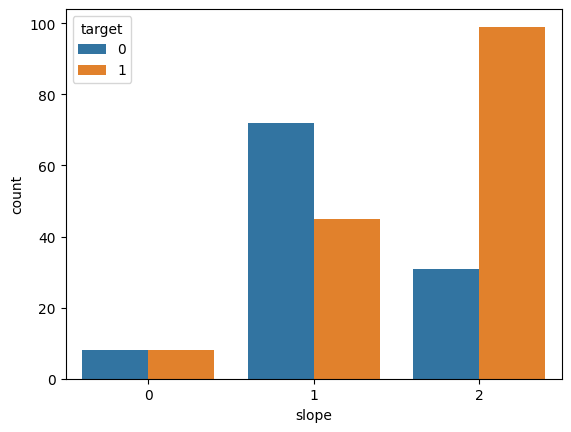

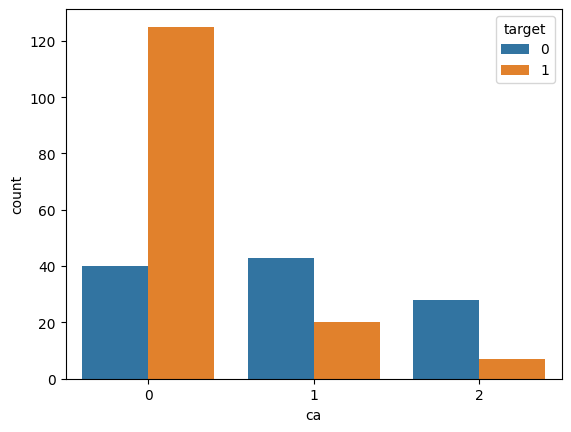

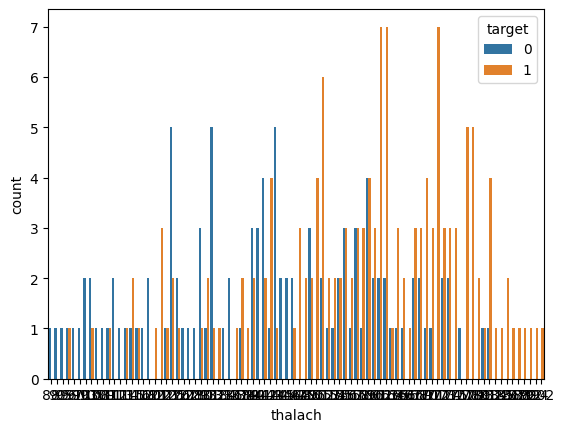

In [89]:
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thalach']

for list_var in cat_feat:
    # fig, axis = plt.subplots(nrows=2,ncols=4,figsize=(15,20))
    sns.countplot(x=list_var, hue='target', data=data)
    plt.show()

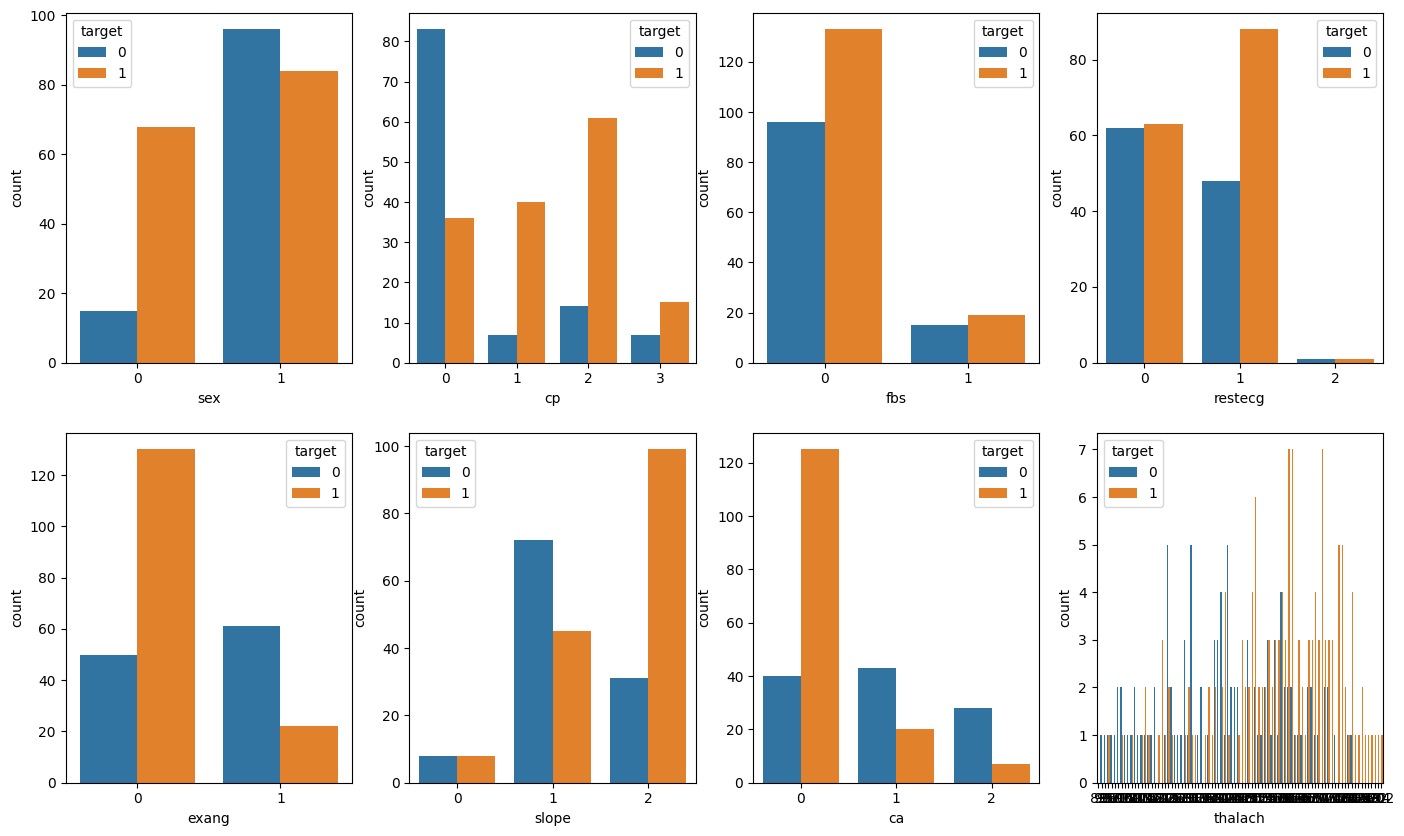

In [90]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thalach', 'target']

for idx, feature in enumerate(cat_feat):
    if feature != 'target':
        ax = axes[int(idx/4), idx%4]
        # ax = axes[1,2]
        sns.countplot(x=feature, hue='target', data=data,ax=ax)

Let's get some insights frm this chart:

Chest pain: the heart desease diagnosis is greater among the patients that feel any chest pain.

Restegc - Eletrocardiagraph results: the rate of heart desease diagnoses higher for patients with a ST-T wabe abnormality .

Slope: The ratio of patients diagnosed with heart desease is higher for slope = 2

Ca: The diagonosed ratio decreases fo ca between 1 and 3.

Thal: the diagnosed ratio is higher for thal = 2

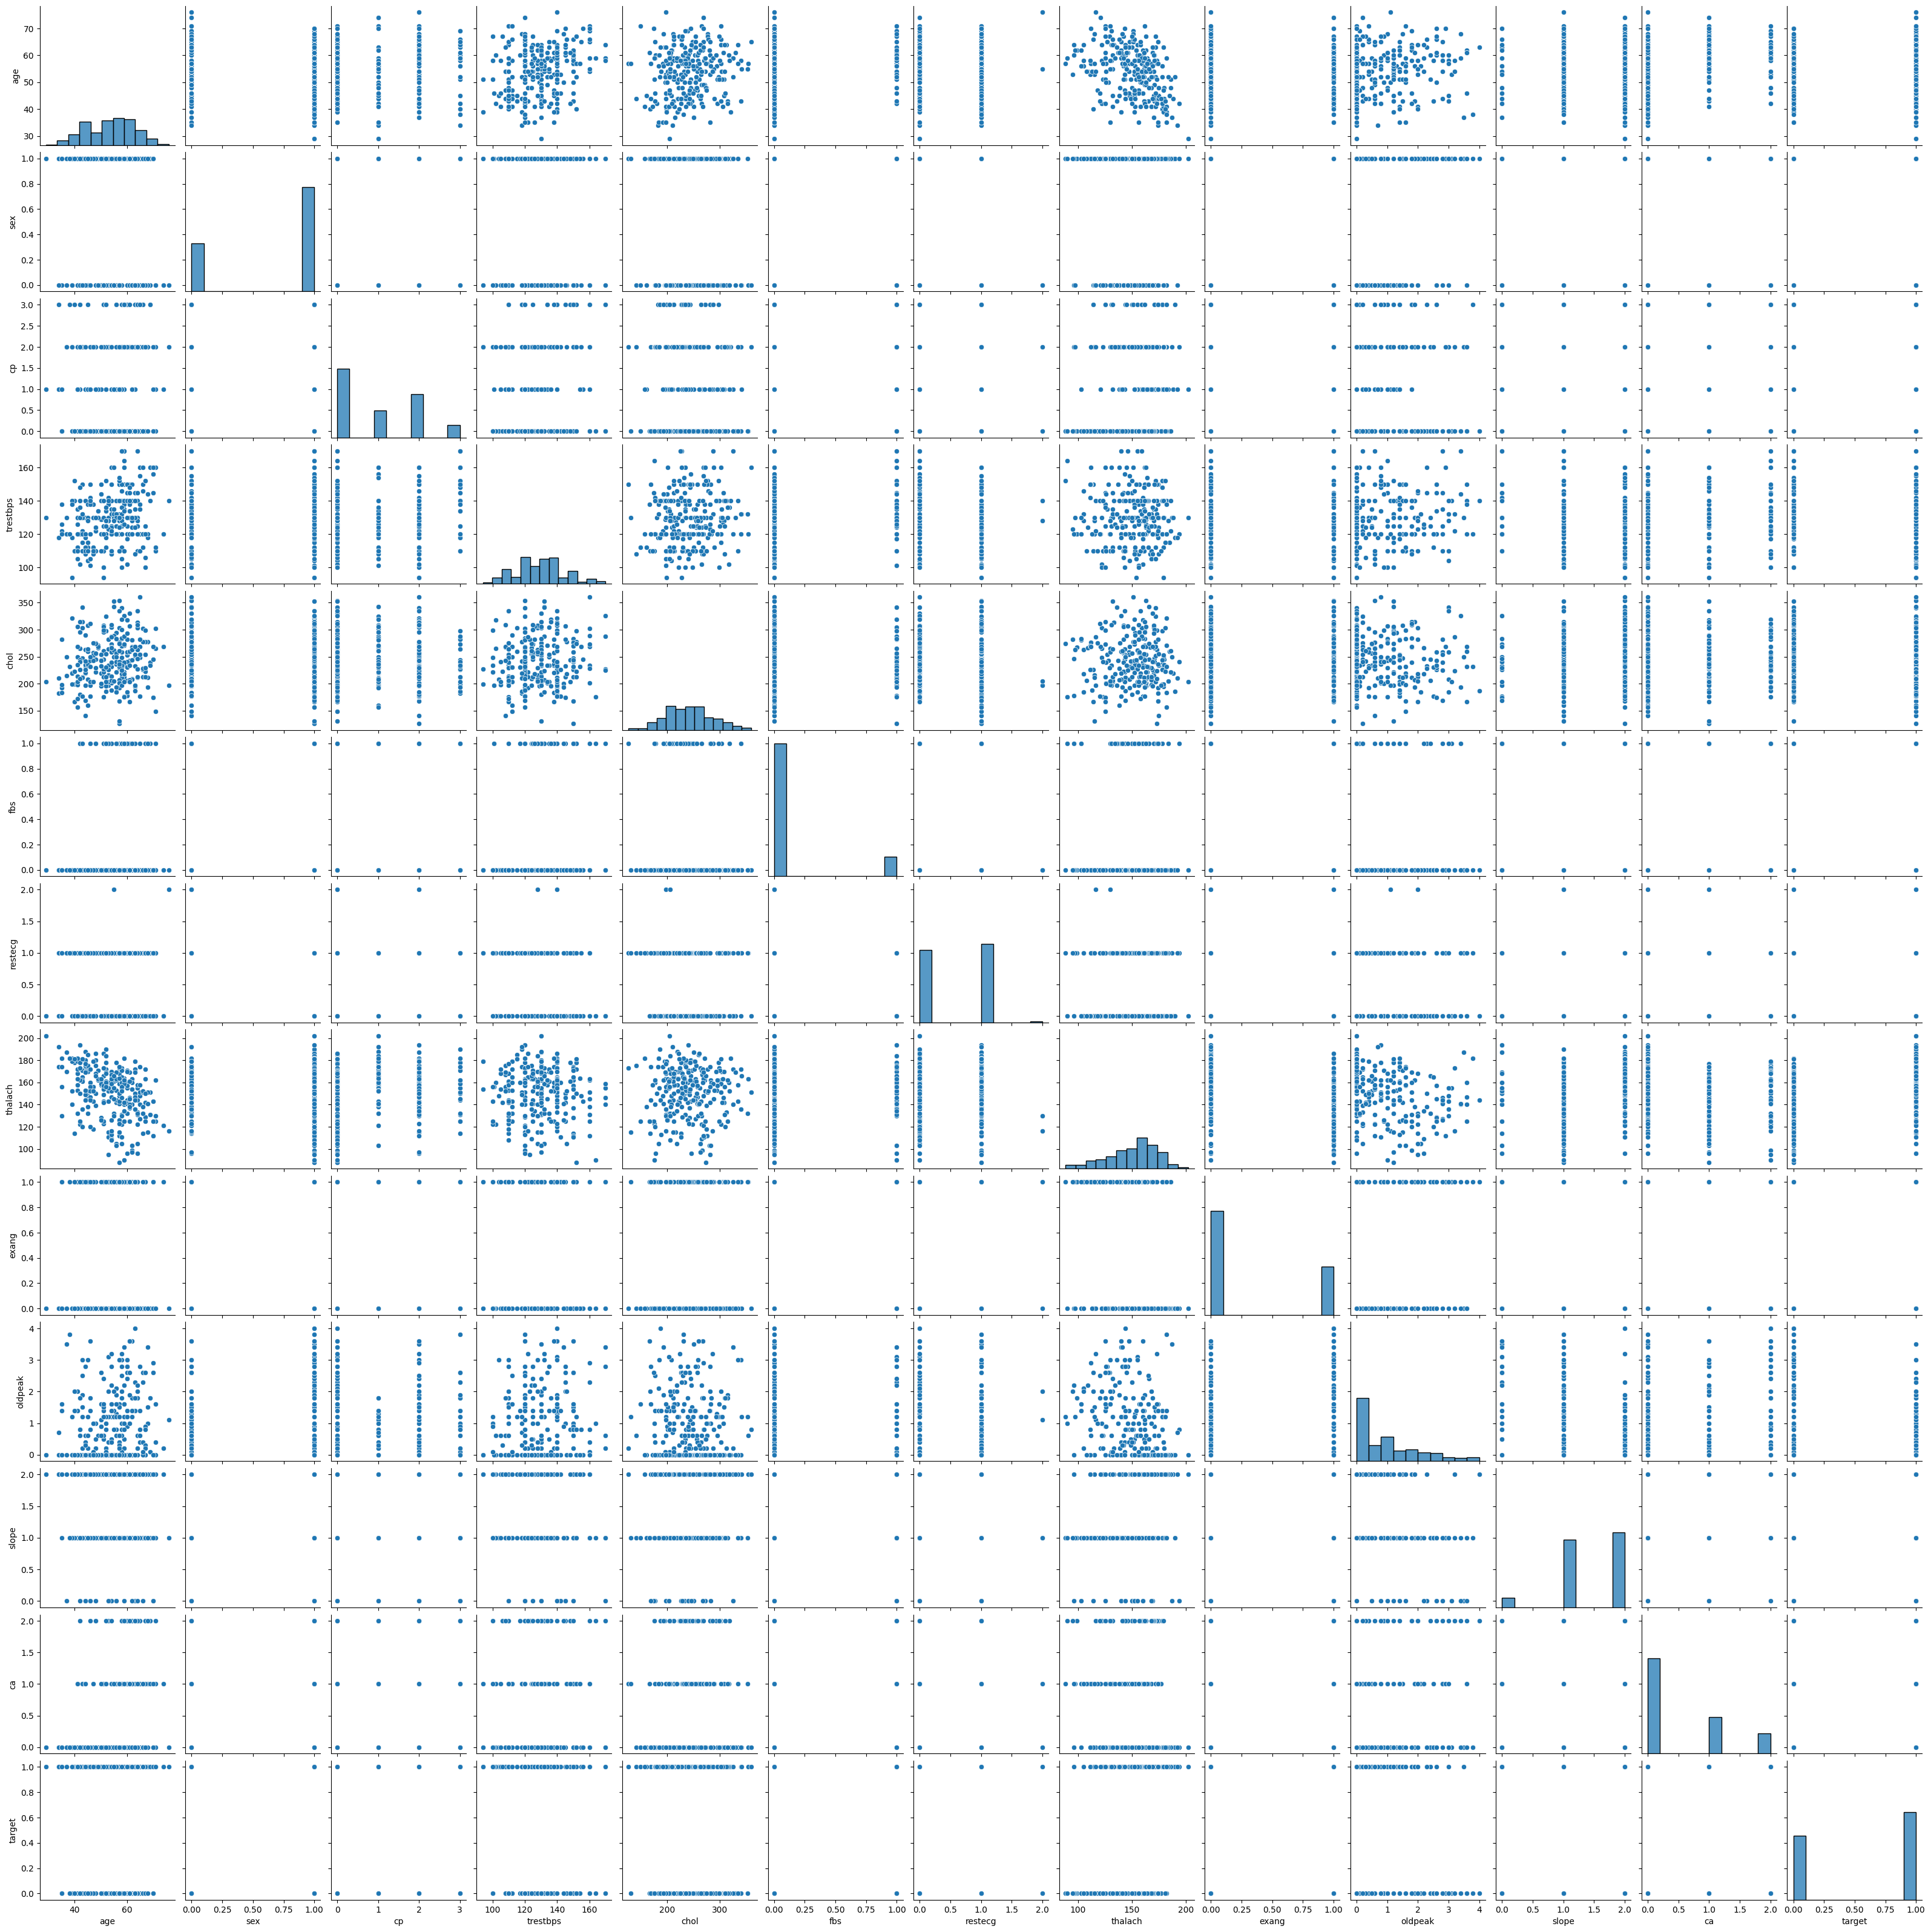

In [91]:
sns.pairplot(data)

In [ ]:
plt.rcParams['figure.figsize'] = (9,6)
sns.countplot(x='target', hue='sex', data=data);
plt.title('Count of target feature by sex')

The amount of healthy male people is greater than the amount of unhealthy. For women, the number of unhealthy women is higher.

In [92]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
age,1.000000,-0.073003,-0.034704,0.278989,0.134360,0.125867,-0.093385,-0.400387,0.086648,0.196797,-0.142011,0.384776,-0.199234
sex,-0.073003,1.000000,-0.102712,0.004696,-0.134317,0.066572,-0.076685,-0.047327,0.179451,0.173408,-0.067810,0.090801,-0.331808
cp,-0.034704,-0.102712,1.000000,0.106855,-0.035193,0.131334,0.057154,0.266465,-0.379244,-0.124251,0.084830,-0.209557,0.408915
trestbps,0.278989,0.004696,0.106855,1.000000,0.095993,0.135088,-0.130263,-0.038457,-0.015881,0.155073,-0.059765,0.056782,-0.088254
chol,0.134360,-0.134317,-0.035193,0.095993,1.000000,-0.028051,-0.120087,0.007063,0.046659,-0.023588,0.055899,0.090842,-0.079090
fbs,0.125867,0.066572,0.131334,0.135088,-0.028051,1.000000,-0.068329,-0.004390,0.006583,0.025517,-0.088599,0.107365,-0.014920
restecg,-0.093385,-0.076685,0.057154,-0.130263,-0.120087,-0.068329,1.000000,0.073034,-0.082495,-0.085060,0.113721,-0.080304,0.136120
thalach,-0.400387,-0.047327,0.266465,-0.038457,0.007063,-0.004390,0.073034,1.000000,-0.408835,-0.330904,0.363833,-0.242111,0.394103
exang,0.086648,0.179451,-0.379244,-0.015881,0.046659,0.006583,-0.082495,-0.408835,1.000000,0.348630,-0.269700,0.182511,-0.430192
oldpeak,0.196797,0.173408,-0.124251,0.155073,-0.023588,0.025517,-0.085060,-0.330904,0.348630,1.000000,-0.528579,0.278723,-0.440017


<Axes: >

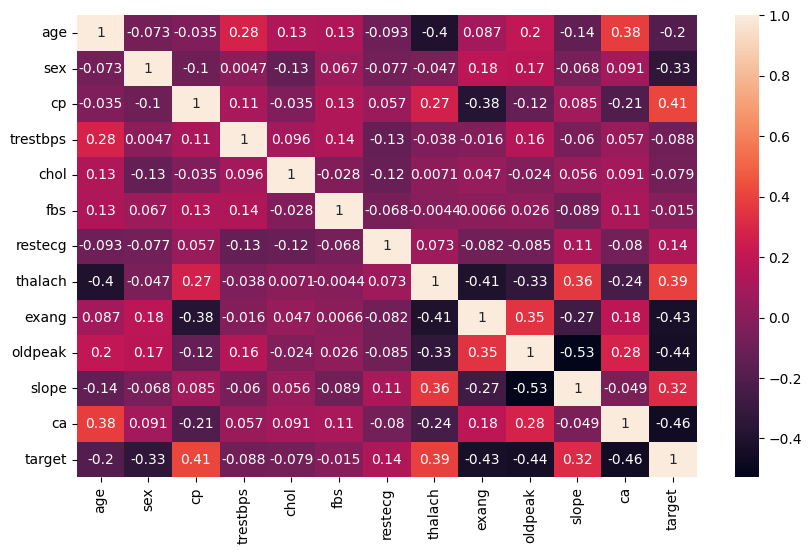

In [93]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True)

Apparently there are no features with a pretty strong correlation (above |0.7|)

Text(0.5, 1.0, ' CP vs Thalach in rest')

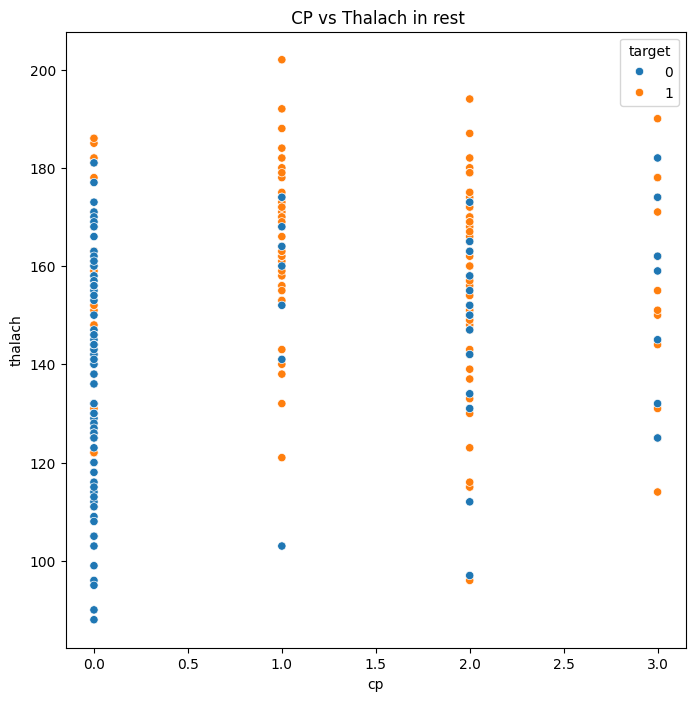

In [94]:
plt.rcParams['figure.figsize'] = (8,8)
sns.scatterplot(x='cp', y='thalach', hue='target', size=None, data=data)
plt.title(' CP vs Thalach in rest')

As can be seen there is a paitient with high cholesterol. But, there's not a specific division between those that feel pain during exercise practice and those of not feel pain. We can use hue to filter by sex. It's also possible to filter using size = 'label_to_filer'.

#Outlier Removal

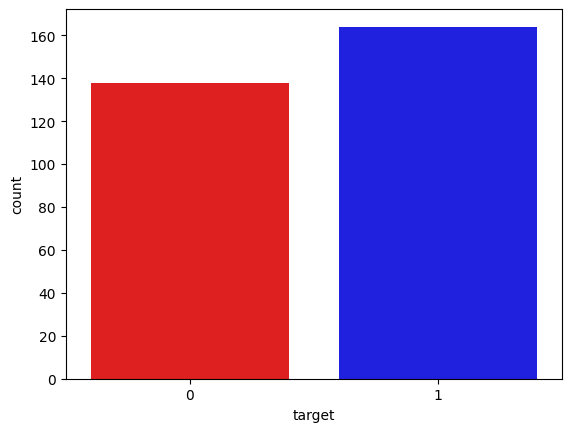

In [43]:
# Count plot of target variable

sns.countplot(x='target', data=data, palette=['red','blue'])
plt.show()

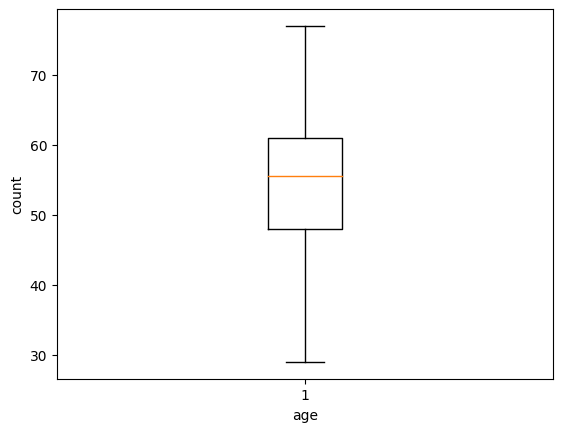

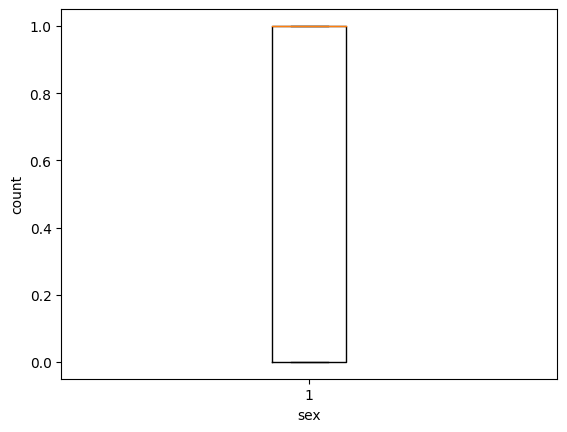

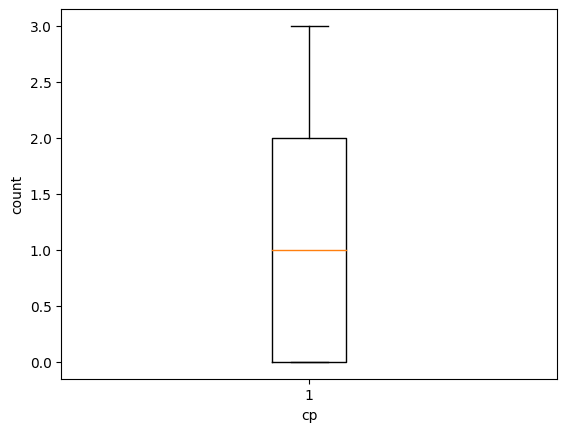

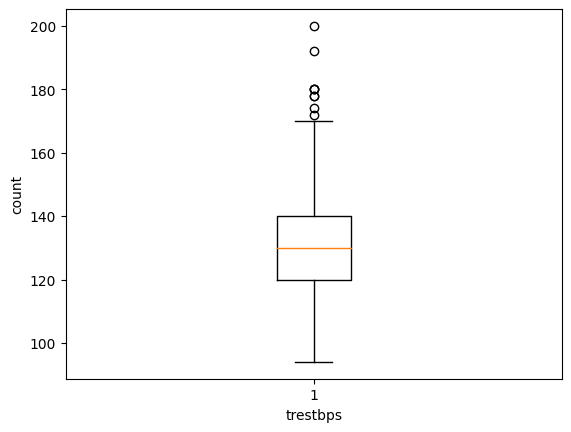

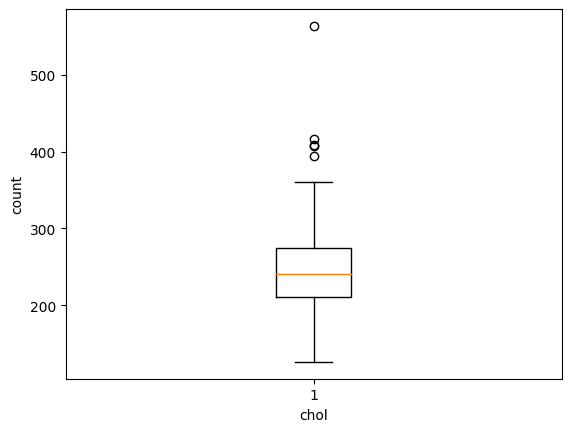

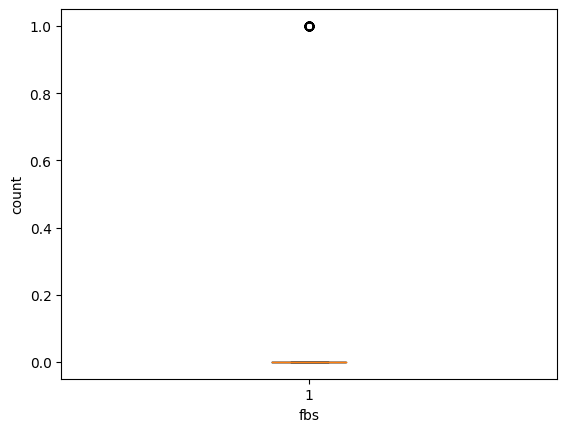

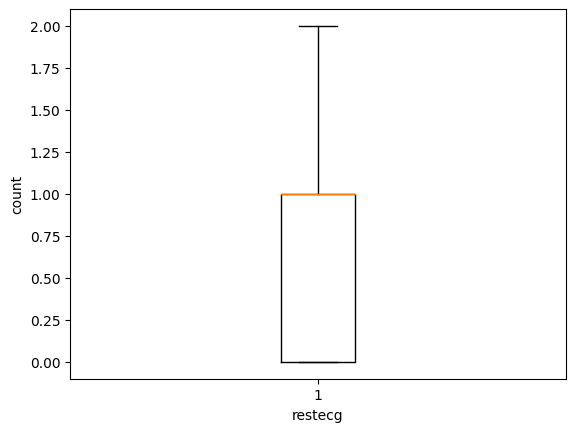

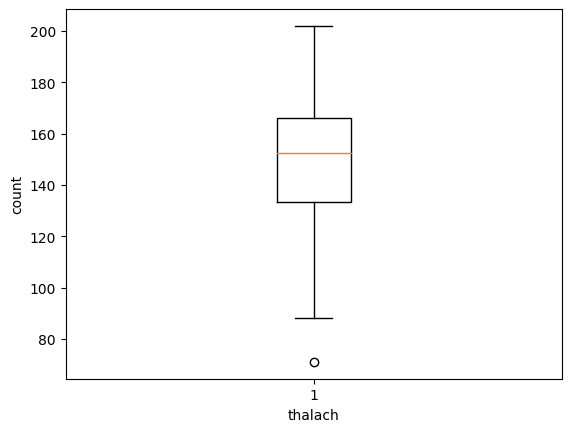

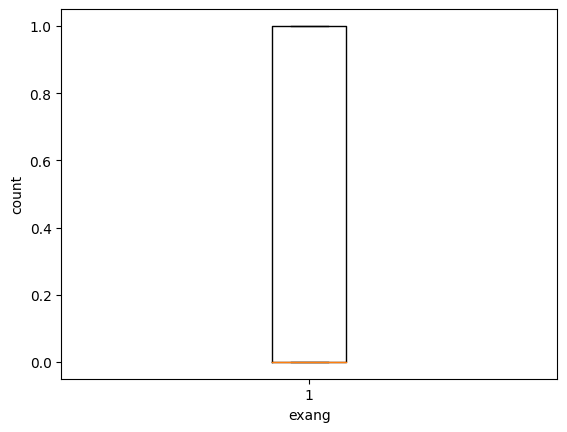

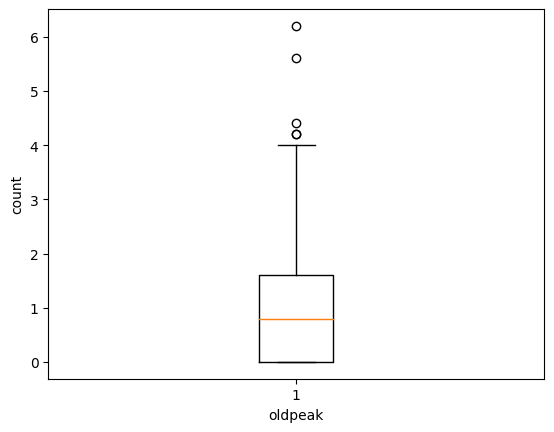

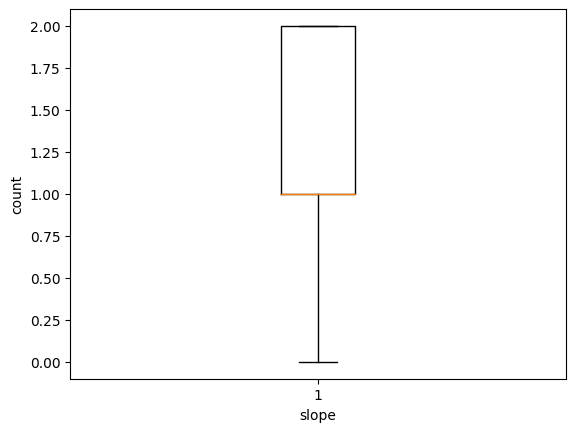

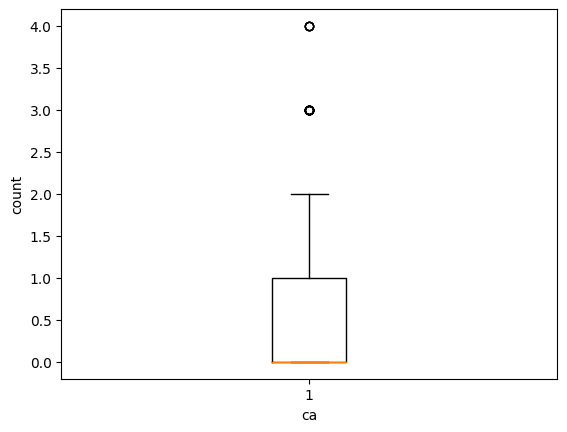

In [44]:
# box plots to identify any outliers in each column of numeric datatype

for i in data.columns:
    if ((data[i].dtype != "object") & (i != "target")):

        plt.boxplot(data[i])
        plt.xlabel(i)
        plt.ylabel("count")
        plt.show()

In [45]:
# filtering columns that needs ouliers removal

out_col = ["trestbps","chol","thalach","oldpeak",'ca']
out_col

['trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

In [46]:
# removing ouliers

for i in out_col:

    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)

    IQR = Q3-Q1

    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR

    data = data[(data[i]<=upper) & (data[i]>=lower)]

In [47]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1


#Split data into features(x) & target(y) label sets

In [51]:
# create dataframe for both x and y

x = pd.DataFrame(data.iloc[:,:-1])
y = pd.DataFrame(data.iloc[:,-1])

In [52]:
x.shape

(263, 12)

In [53]:
y.shape

(263, 1)

#Again Split Data into train & test set

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0) #split train = 80% & test = 20% and random_state can be any +ve number including 0 to take everytime the same random values.

In [55]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(210, 12)
(53, 12)
(210, 1)
(53, 1)


In [56]:
print(len(x_train), x_train.size)
print(len(x_test), x_test.size)
print(len(y_train), y_train.size)
print(len(y_test), y_test.size)

210 2520
53 636
210 210
53 53


#Logistic Model

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()                       #Logistics Regression object is created named model.
model.fit(x_train, y_train)                        #training the model with 80% data using fit() function

LogisticRegression()

In [58]:
y_pred = model.predict(x_test)    #predicting values by pasing 20% x_test values.
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [59]:
print(len(y_pred), y_pred.size)

53 53


#Calculating the Accuracy

In [60]:
print('Accuracy Score: %0.2f'%model.score(x_train, y_train))

Accuracy Score: 0.88


In [61]:
print('Accuracy: %0.2f'%model.score(x_test, y_test))

Accuracy: 0.75


#Evaluate the model using Confusion Metrics

In [62]:
from sklearn.metrics import confusion_matrix
confuse_matrix = confusion_matrix(y_train, model.predict(x_train))  #creating confusion matrix which have [[TP FP] [FN TN]]
print(confuse_matrix)

[[ 72  16]
 [  9 113]]


Manually check the accurace from above:

Accuarcy: (TP + TN) / (TP + FP + FN + TN)

Accuracy: (84 + 118) / (84+27+13+118) = 0.8347

Which is same from above train accuracy.

In [63]:
from sklearn.metrics import confusion_matrix
confuse_matrix = confusion_matrix(y_test, model.predict(x_test))  #creating confusion matrix which have [[TP FP] [FN TN]]
print(confuse_matrix)

[[12 11]
 [ 2 28]]


Manually check the accurace from above:

Accuarcy: (TP + TN) / (TP + FP + FN + TN)

Accuracy: (20 + 30) / (20+7+4+30) = 0.8196

Which is same from above test accuracy.

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_train, model.predict(x_train)))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        88
           1       0.88      0.93      0.90       122

    accuracy                           0.88       210
   macro avg       0.88      0.87      0.88       210
weighted avg       0.88      0.88      0.88       210



In [65]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [66]:
y_pred = pd.DataFrame(model.predict(x_test))
y_pred

,0
0,0
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,0


In [67]:
pred_proba_train = pd.DataFrame(model.predict_proba(x_train))    #predict_proba gives the probalities of having and not having heart attack % for each record.
pred_proba_train.columns = ['pbt_not_having_heart_attack', 'pbt_having_heart_attack']          #assigning columns names.
pred_proba_train

,pbt_not_having_heart_attack,pbt_having_heart_attack
0,0.369269,0.630731
1,0.030192,0.969808
2,0.035886,0.964114
3,0.019336,0.980664
4,0.927461,0.072539
...,...,...
205,0.608722,0.391278
206,0.983492,0.016508
207,0.054660,0.945340
208,0.045105,0.954895


Here by default it takes 0.5 as the cut off. But if you want to change cut-off you can do it after the above step. So other new column gets add for the above with 0's and 1's prediction.

Also from above we are interested only with the column having heart attacks, so that we can build a ROCAUC curve.

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred)

fpr, tpr, thersholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])    #false positive rate, true positive rate

print(logit_roc_auc)
print(fpr)
print(tpr)
print(thersholds)

0.7275362318840579
[0.         0.         0.         0.04347826 0.04347826 0.08695652
 0.08695652 0.17391304 0.17391304 0.26086957 0.26086957 0.30434783
 0.30434783 0.39130435 0.39130435 0.43478261 0.43478261 0.91304348
 0.91304348 1.         1.        ]
[0.         0.03333333 0.23333333 0.23333333 0.4        0.4
 0.5        0.5        0.6        0.6        0.76666667 0.76666667
 0.8        0.8        0.9        0.9        0.93333333 0.93333333
 0.96666667 0.96666667 1.        ]
[1.99303209 0.99303209 0.95388901 0.94709033 0.92787353 0.9207437
 0.90434382 0.89353044 0.87408763 0.86115689 0.76134323 0.71031281
 0.68476997 0.66381096 0.54288265 0.51857993 0.51510793 0.03072904
 0.02676597 0.01716641 0.01497827]


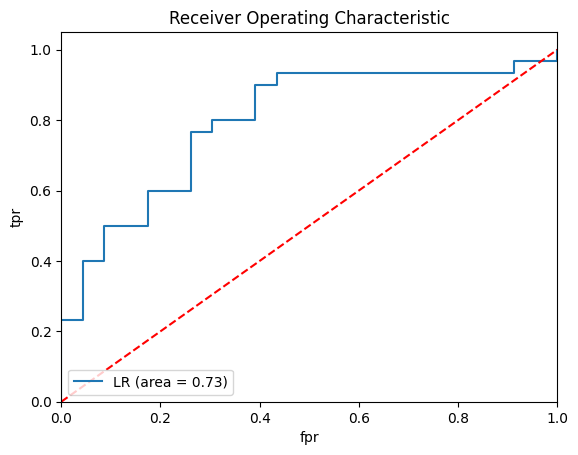

In [69]:
plt.figure()
plt.plot(fpr,tpr,label='LR (area = %0.2f)'%logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower left')
# plt.savefig('Logistics Regression of Heart Attack')
plt.show()

In the above graph the area under the blue line is ROC which is covering 81% from legend.

If you consider more features which are related to target, then their is a chance of increasing the ROC area, which is good.

#Decision Tree Model

In [70]:
# import model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [71]:
# training the model
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [72]:
# predicting using x_test values

y_pred = model.predict(x_test)
y_pred.shape

(53,)

In [73]:
# calculate accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred)

0.6981132075471698

In [74]:
# calculate confusion matrix

confusion_matrix(y_test,y_pred)

array([[14,  9],
       [ 7, 23]])

#Hyperparameter tuning refers to the process of selecting the optimal values for the hyperparameters of a machine learning model.

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the decision tree classifier
model = DecisionTreeClassifier()  #dummy

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [76]:
# Retrieve the best hyperparameters and model
best_params = grid_search.best_params_
best_dt = grid_search.best_estimator_
print(best_dt)
print(best_params)

DecisionTreeClassifier(max_depth=10, min_samples_split=5)
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [77]:
# predicting test values

y_pred = best_dt.predict(x_test)

In [78]:
#accuracy score of the model after hyperparameter tuning

accuracy_score(y_test,y_pred)

0.6792452830188679